In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('./data/ma_resp_data_temp.csv',header=0)

In [3]:
pd.set_option('max_columns',100)  # 显示100列数据

In [4]:
df.head()

,KBM_INDV_ID,resp_flag,GEND,CA00,CA03,CA06,CA11,CA16,AART,ADBT,ADEP,AHBP,AHCH,ARES,AHRT,AASN,ADGS,AHRL,ASKN,AVIS,BANK,COLLEGE,FINI,INLI,INMEDI,INVE,IOLP,MOBPLUS,N2NCY,NY8Y9,N2N29,N3N39,N4N49,N5N59,N6N64,N65P,ONLA,POEP,SGFA,SGLL,SGOE,SGSE,SGTC,U18,LIVEWELL,NOC19,NAH19,NPH19,POC19,HOMSTAT,HINSUB,STATE_NAME,age,c210apvt,c210b200,c210blu,c210bpvt,c210cip,c210ebi,c210hmi,c210hva,c210kses,c210mah,c210mob,c210mys,c210pdv,c210pmr,c210poo,c210psu,c210pwc,c210wht,ilor,meda,pdpe,tins,zhip19
0,281478,0,M,4,0,5,1,1,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,S,A,N,N,Y,N,N,Y,Y,Y,Y,N,N,N,N,N,N,1.0,5,3,8,Y,Y,C,CA,67.0,99,11.0,10,1,74.0,71,90.0,738.0,111,64.0,0,5,14,52,65,71.0,22,79.0,15.0,64.0,42,8,8
1,290485,0,M,0,0,0,0,0,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,P,A,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,N,4.0,0,1,1,U,Y,U,CA,76.0,98,6.0,15,2,69.0,69,84.0,494.0,97,56.0,0,4,15,44,81,99.0,37,65.0,17.0,61.0,46,6,3
2,299949,0,F,0,0,0,0,0,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,M,A,N,N,N,N,N,N,Y,Y,N,N,N,N,N,N,N,3.0,0,1,1,U,Y,U,CA,67.0,88,NaN,26,12,32.0,44,50.0,516.0,83,50.0,0,4,17,38,44,62.0,44,47.0,20.0,61.0,46,7,3
3,314635,0,F,0,4,0,0,0,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,S,B,N,N,N,Y,Y,N,Y,Y,Y,N,N,N,N,N,N,1.0,1,4,5,Y,Y,C,CA,71.0,96,NaN,15,4,82.0,82,103.0,473.0,105,52.0,0,4,14,45,71,99.0,39,71.0,4.0,62.0,37,8,9
4,363702,0,F,0,0,0,0,0,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,Y,M,B,N,N,N,N,N,N,Y,Y,N,Y,Y,N,Y,Y,N,3.0,0,1,1,U,U,A,CA,75.0,88,NaN,9,12,38.0,47,55.0,523.0,89,50.0,10,4,29,32,13,36.0,15,65.0,9.0,NaN,37,4,3


#### 了解数据

In [5]:
df.shape

(43666, 76)

In [6]:
df.dtypes

KBM_INDV_ID      int64
resp_flag        int64
GEND            object
CA00             int64
CA03             int64
CA06             int64
CA11             int64
CA16             int64
AART            object
ADBT            object
ADEP            object
AHBP            object
AHCH            object
ARES            object
AHRT            object
AASN            object
ADGS            object
AHRL            object
ASKN            object
AVIS            object
BANK            object
COLLEGE         object
FINI            object
INLI            object
INMEDI          object
INVE            object
IOLP            object
MOBPLUS         object
N2NCY           object
NY8Y9           object
                ...   
NAH19            int64
NPH19            int64
POC19           object
HOMSTAT         object
HINSUB          object
STATE_NAME      object
age            float64
c210apvt         int64
c210b200       float64
c210blu          int64
c210bpvt         int64
c210cip        float64
c210ebi    

In [7]:
# 记录最初的数据类型，保存下来，方便之后对比
type_first = df.dtypes
type_first.to_excel('./output/var_type_original.xlsx')

FileNotFoundError: [Errno 2] No such file or directory: './output/var_type_original.xlsx'

In [9]:
# 将ID转换成object
df['KBM_INDV_ID'] = df['KBM_INDV_ID'].astype('object')

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
resp_flag,43666.0,0.400518,0.490009,0.0,0.0,0.0,1.0,1.0
CA00,43666.0,0.267806,0.996459,0.0,0.0,0.0,0.0,6.0
CA03,43666.0,0.214034,0.886914,0.0,0.0,0.0,0.0,7.0
CA06,43666.0,0.381968,1.178281,0.0,0.0,0.0,0.0,7.0
CA11,43666.0,0.313196,1.047293,0.0,0.0,0.0,0.0,7.0
CA16,43666.0,0.224316,0.858203,0.0,0.0,0.0,0.0,7.0
LIVEWELL,43661.0,2.842125,1.172255,1.0,2.0,3.0,4.0,6.0
NOC19,43666.0,0.465717,1.045087,0.0,0.0,0.0,0.0,9.0
NAH19,43666.0,2.080818,1.215852,0.0,1.0,2.0,3.0,9.0
NPH19,43666.0,2.546535,1.903632,0.0,1.0,2.0,3.0,16.0


In [11]:
describe = df.describe().T
describe.to_excel('./output/describe_var.xlsx')

FileNotFoundError: [Errno 2] No such file or directory: './output/describe_var.xlsx'

#### 统计一下每一列中有多少空值

In [12]:
#  检查缺失列的数量
len(df.columns) - df.dropna(axis=1).shape[1]

20

In [13]:
# 统计各列中空值的数量
df_null_sum = df.isnull().sum()

In [14]:
# 将不为零的数据过滤出来
NA = df.isnull().sum()

In [15]:
NA = NA.reset_index()
NA

,index,0
0,KBM_INDV_ID,0
1,resp_flag,0
2,GEND,0
3,CA00,0
4,CA03,0
5,CA06,0
6,CA11,0
7,CA16,0
8,AART,0
9,ADBT,0


In [16]:
# 重置列名
NA.columns = ['Var','NA_count']
NA

,Var,NA_count
0,KBM_INDV_ID,0
1,resp_flag,0
2,GEND,0
3,CA00,0
4,CA03,0
5,CA06,0
6,CA11,0
7,CA16,0
8,AART,0
9,ADBT,0


In [17]:
# 过滤出大于0的数据
NA = NA[NA.NA_count>0].reset_index(drop=True)
NA

,Var,NA_count
0,AASN,10
1,ASKN,8
2,COLLEGE,8
3,MOBPLUS,7
4,N2NCY,10
5,NY8Y9,9
6,POEP,8
7,LIVEWELL,5
8,HOMSTAT,10
9,HINSUB,11


In [18]:
# 把空值个数，换算成比例
NA.NA_count/df.shape[0]

0     0.000229
1     0.000183
2     0.000183
3     0.000160
4     0.000229
5     0.000206
6     0.000183
7     0.000115
8     0.000229
9     0.000252
10    0.000092
11    0.000115
12    0.000046
13    0.000160
14    0.000344
15    0.000344
16    0.000527
17    0.000321
18    0.000137
19    0.000344
Name: NA_count, dtype: float64

#### 查看数据中是否有重复值

In [19]:
df[df.duplicated()]

,KBM_INDV_ID,resp_flag,GEND,CA00,CA03,CA06,CA11,CA16,AART,ADBT,ADEP,AHBP,AHCH,ARES,AHRT,AASN,ADGS,AHRL,ASKN,AVIS,BANK,COLLEGE,FINI,INLI,INMEDI,INVE,IOLP,MOBPLUS,N2NCY,NY8Y9,N2N29,N3N39,N4N49,N5N59,N6N64,N65P,ONLA,POEP,SGFA,SGLL,SGOE,SGSE,SGTC,U18,LIVEWELL,NOC19,NAH19,NPH19,POC19,HOMSTAT,HINSUB,STATE_NAME,age,c210apvt,c210b200,c210blu,c210bpvt,c210cip,c210ebi,c210hmi,c210hva,c210kses,c210mah,c210mob,c210mys,c210pdv,c210pmr,c210poo,c210psu,c210pwc,c210wht,ilor,meda,pdpe,tins,zhip19


#### 可视化数据查看数据分布

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn')

In [21]:
# 支持中文
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False
# plt.rcParams['font.family']='Arial Unicode MS'

#### 看一下目标变量是否平衡

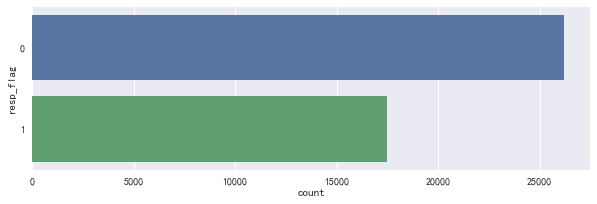

In [22]:
plt.figure(figsize=(10,3))
sns.countplot(y='resp_flag',data=df)
plt.show()

In [23]:
# 计算购买用户和未购买用户的比例
df.resp_flag.sum()/df.resp_flag.shape[0]

0.4005175651536665

In [24]:
1- df.resp_flag.sum()/df.resp_flag.shape[0]

0.5994824348463335

#### 绘制年龄分布情况

In [28]:
#df['age']

D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


ValueError: max must be larger than min in range parameter.

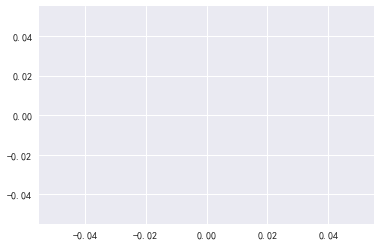

In [26]:
sns.distplot(df['age'],bins=20)

#### 两类样本的年龄分布

##### kdeplot

核密度估计（kernel density estimation），通过图直观地看到数据样本本身的分布特征。

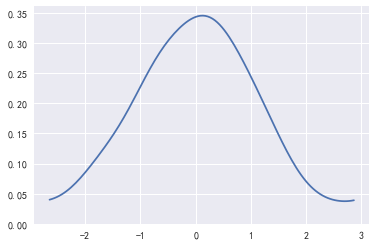

In [35]:
X = np.random.randn(100)
sns.kdeplot(X,cut=0)

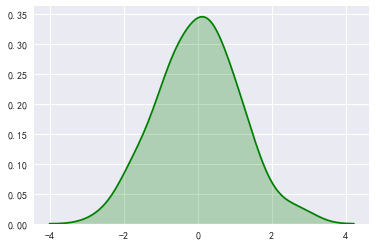

In [36]:
sns.kdeplot(X,shade=True,color='g')

Text(0, 0.5, 'Density')

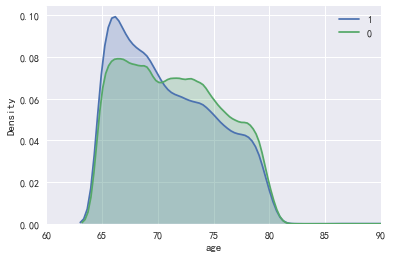

In [38]:
sns.kdeplot(df.age[df.resp_flag==1],label='1',shade=True)
sns.kdeplot(df.age[df.resp_flag==0],label='0',shade=True)
plt.xlim([60,90])
plt.xlabel('age')
plt.ylabel('Density')